In [1]:
from google.colab import drive
drive. mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small.zip","r") as dataset_zip:
    dataset_zip.extractall("/content")

In [3]:
import os
dataset_directory = "/content/cats_vs_dogs_small"
print( "Contents of the base directory:", os.listdir(dataset_directory))

Contents of the base directory: ['test', 'validation', 'train']


In [6]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.7 MB/s eta 0:00:00


In [7]:
import numpy as np
import matplotlib.pyplot as plot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, applications

train_dataset = '/content/cats_vs_dogs_small/train'
val_dataset = '/content/cats_vs_dogs_small/validation'
test_dataset = '/content/cats_vs_dogs_small/test'


In [8]:
# Load datasets
training_set = keras.preprocessing.image_dataset_from_directory(
    train_dataset,
    image_size=(180, 180),
    batch_size=32)


Found 2000 files belonging to 2 classes.


In [9]:
validation_set = keras.preprocessing.image_dataset_from_directory(
    val_dataset,
    image_size=(180, 180),
    batch_size=32)


Found 1000 files belonging to 2 classes.


In [10]:
testing_set = keras.preprocessing.image_dataset_from_directory(
    test_dataset,
    image_size=(180, 180),
    batch_size=32)


Found 1000 files belonging to 2 classes.


In [11]:
# Display sample images
def show_images(dataset):
    plot.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plot.subplot(3, 3, i + 1)
            plot.imshow(images[i].numpy().astype("uint8"))


In [12]:
# Display sample images
def show_images(dataset):
    plot.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plot.subplot(3, 3, i + 1)
            plot.imshow(images[i].numpy().astype("uint8"))
            plot.title("Cat" if labels[i] == 0 else "Dog")
            plot.axis("off")
    plot.show()


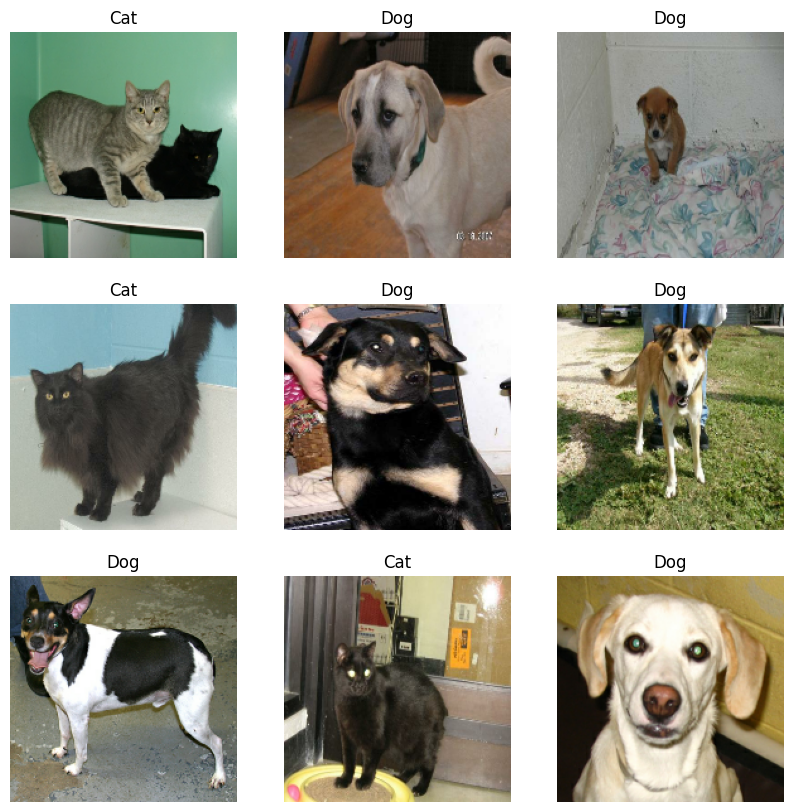

In [13]:
# Call the function to display images
show_images(training_set)


In [14]:
# Function to create a CNN model from scratch
def cnn_scratch_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [15]:
# Data augmentation and preprocessing with sample size parameter
def get_data_generators(train_dataset, val_dataset, batch_size, num_samples=None):  # Add num_samples parameter with default None
    train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
    )
    val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dataset,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='binary',
    )
    val_generator = val_datagen.flow_from_directory(
        val_dataset,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='binary',
    )
    return train_generator, val_generator  # Return both generators


In [16]:
# Train the CNN model
def train_model(model, train_generator, val_generator, epochs=30):
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=epochs
    )
    return history


In [ ]:
# Step 1: Train CNN model from scratch
train_gen_1, val_gen_1 = get_data_generators(train_dataset, val_dataset, batch_size=32)
model_A = cnn_scratch_model()
history_A = train_model(model_A, train_gen_1, val_gen_1)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 379ms/step - accuracy: 0.5178 - loss: 1.0551 - val_accuracy: 0.5010 - val_loss: 0.6918
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 373ms/step - accuracy: 0.5080 - loss: 0.6968 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 370ms/step - accuracy: 0.4951 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 376ms/step - accuracy: 0.4932 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 372ms/step - accuracy: 0.5014 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 371ms/step - accuracy: 0.4893 - loss: 0.6931 - val_accuracy: 0.5010 - val_loss: 0.6909
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 377ms/step - accuracy: 0.4883 - loss: 0.6930 - val_accuracy: 0.5380 - val_loss: 0.6887
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 372ms/step - accuracy: 0.5263 - loss: 0.6897 - val_accu

In [ ]:
# Step 2: Increase training samples to 1500
train_gen_2, val_gen_2 = get_data_generators(train_dataset, val_dataset, batch_size=32, num_samples=1500)
model_B = cnn_scratch_model()
history_B = train_model(model_B, train_gen_2, val_gen_2)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 373ms/step - accuracy: 0.4861 - loss: 0.9703 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 368ms/step - accuracy: 0.5385 - loss: 0.6882 - val_accuracy: 0.5640 - val_loss: 0.6878
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 373ms/step - accuracy: 0.6064 - loss: 0.6768 - val_accuracy: 0.6070 - val_loss: 0.6446
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 369ms/step - accuracy: 0.6095 - loss: 0.6619 - val_accuracy: 0.5570 - val_loss: 0.6654
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 371ms/step - accuracy: 0.6280 - loss: 0.6486 - val_accuracy: 0.6150 - val_loss: 0.6475
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 366ms/step - accuracy: 0.6549 - loss: 0.6209 - val_accuracy: 0.6230 - val_loss: 0.6341
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 370ms/step - accuracy: 0.6626 - loss: 0.6237 - val_accuracy: 0.6350 - val_loss: 0.6418
Epoch 8/30
63

In [ ]:
# Step 3: Use the full 2000 samples
train_gen_3, val_gen_3 = get_data_generators(train_dataset, val_dataset, batch_size=32, num_samples=2000)
model_C = cnn_scratch_model()
history_C = train_model(model_C, train_gen_3, val_gen_3)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 369ms/step - accuracy: 0.5191 - loss: 0.8191 - val_accuracy: 0.5120 - val_loss: 0.6928
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 369ms/step - accuracy: 0.5113 - loss: 0.6925 - val_accuracy: 0.5280 - val_loss: 0.6912
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 370ms/step - accuracy: 0.5654 - loss: 0.6849 - val_accuracy: 0.6200 - val_loss: 0.6495
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 366ms/step - accuracy: 0.5758 - loss: 0.6712 - val_accuracy: 0.5350 - val_loss: 0.6886
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 366ms/step - accuracy: 0.5544 - loss: 0.6898 - val_accuracy: 0.6300 - val_loss: 0.6520
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 372ms/step - accuracy: 0.6361 - loss: 0.6462 - val_accuracy: 0.6240 - val_loss: 0.6362
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 368ms/step - accuracy: 0.6205 - loss: 0.6582 - val_accuracy: 0.6170 - val_loss: 0.6437
Epoch 8/30
63

In [ ]:
# Step 4: Use a pretrained CNN model (e.g., VGG16)
def cnn_pretrained_model():
    base_model = applications.VGG16(include_top=False, weights='imagenet', input_shape=(180, 180, 3))
    base_model.trainable = False  # Freeze the base model

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Repeat Steps 1–3 with the pretrained CNN model
model_P1 = cnn_pretrained_model()
history_P1 = train_model(model_P1, train_gen_1, val_gen_1)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 636ms/step - accuracy: 0.6812 - loss: 1.1828 - val_accuracy: 0.8770 - val_loss: 0.3046
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 616ms/step - accuracy: 0.8312 - loss: 0.3694 - val_accuracy: 0.8940 - val_loss: 0.2800
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 616ms/step - accuracy: 0.8561 - loss: 0.3440 - val_accuracy: 0.8970 - val_loss: 0.2460
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 616ms/step - accuracy: 0.8576 - loss: 0.3212 - val_accuracy: 0.9010 - val_loss: 0.2360
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 613ms/step - accuracy: 0.8712 - loss: 0.3152 - val_accuracy: 0.8810 - val_loss: 0.3048
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 614ms/step - accuracy: 0.8344 - loss: 0.3711 - val_accuracy: 0.9020 - val_loss: 0.2301
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 613ms/step - accuracy: 0.8824 - loss: 0.3020 - val_accuracy: 0.9120 - val_loss: 0.2083
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 618m

In [ ]:
model_P2 = cnn_pretrained_model()
history_P2 = train_model(model_P2, train_gen_2, val_gen_2)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 611ms/step - accuracy: 0.6175 - loss: 1.6180 - val_accuracy: 0.8390 - val_loss: 0.3447
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 608ms/step - accuracy: 0.8254 - loss: 0.3782 - val_accuracy: 0.9040 - val_loss: 0.2432
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 609ms/step - accuracy: 0.8433 - loss: 0.3454 - val_accuracy: 0.9150 - val_loss: 0.2322
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 610ms/step - accuracy: 0.8677 - loss: 0.3214 - val_accuracy: 0.9070 - val_loss: 0.2356
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 615ms/step - accuracy: 0.8702 - loss: 0.2850 - val_accuracy: 0.9040 - val_loss: 0.2448
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 608ms/step - accuracy: 0.8427 - loss: 0.3216 - val_accuracy: 0.8940 - val_loss: 0.2364
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 612ms/step - accuracy: 0.8837 - loss: 0.2707 - val_accuracy: 0.9110 - val_loss: 0.2162
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 623ms/step - accuracy: 0.8652 - loss: 0.3129 - val_accu

In [ ]:
model_P3 = cnn_pretrained_model()
history_P3 = train_model(model_P3, train_gen_3, val_gen_3)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 623ms/step - accuracy: 0.5813 - loss: 1.6053 - val_accuracy: 0.8860 - val_loss: 0.2871
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 611ms/step - accuracy: 0.8265 - loss: 0.3853 - val_accuracy: 0.8920 - val_loss: 0.2453
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 614ms/step - accuracy: 0.8446 - loss: 0.3377 - val_accuracy: 0.9020 - val_loss: 0.2489
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 612ms/step - accuracy: 0.8647 - loss: 0.3002 - val_accuracy: 0.9090 - val_loss: 0.2152
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 608ms/step - accuracy: 0.8700 - loss: 0.2921 - val_accuracy: 0.8960 - val_loss: 0.2376
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 608ms/step - accuracy: 0.8587 - loss: 0.3223 - val_accuracy: 0.9080 - val_loss: 0.2289
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 603ms/step - accuracy: 0.8574 - loss: 0.3244 - val_accuracy: 0.9000 - val_loss: 0.2264
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 608ms/step - accuracy: 0.8729 - loss: 0.2880 - val_accu

In [ ]:
# Performance visualization function
def visualize_performance(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plot.figure(figsize=(12, 5))

    # Accuracy plot
    plot.subplot(1, 2, 1)
    plot.plot(acc, label='Training Accuracy')
    plot.plot(val_acc, label='Validation Accuracy')
    plot.title(f'{title} - Accuracy')
    plot.xlabel('Epochs')
    plot.ylabel('Accuracy')
    plot.legend()

    # Loss plot
    plot.subplot(1, 2, 2)
    plot.plot(train_loss, label='Training Loss')
    plot.plot(val_loss, label='Validation Loss')
    plot.title(f'{title} - Loss')
    plot.xlabel('Epochs')
    plot.ylabel('Loss')
    plot.legend()

    plot.tight_layout()
    plot.show()


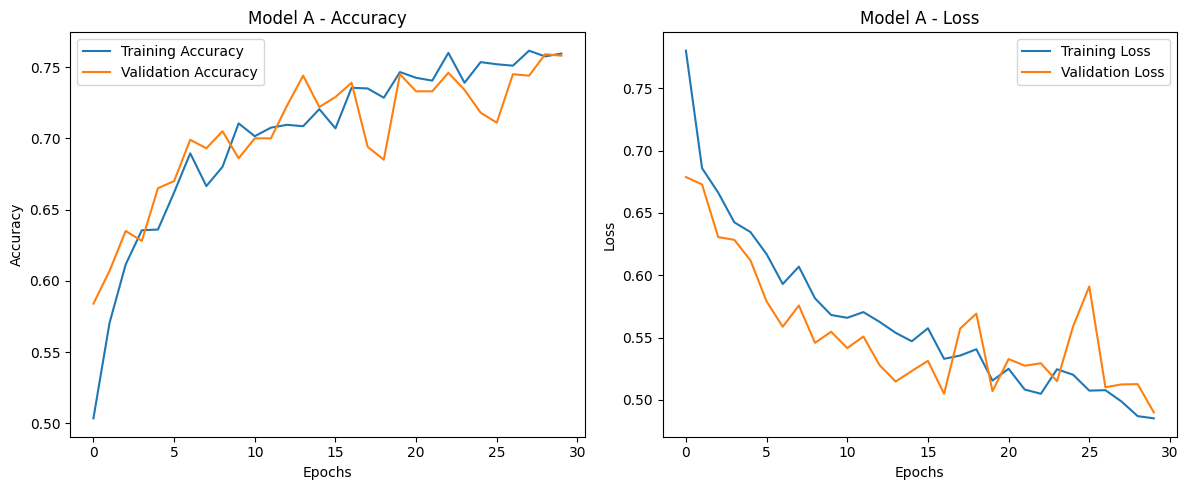

In [ ]:
visualize_performance(history_A, "Model A")


In [ ]:
# Function to summarize final results
def aggregate_results(all_histories):
    summary = {}
    for label, history in all_histories:
        final_train_acc = history.history['accuracy'][-1]
        final_val_acc = history.history['val_accuracy'][-1]
        summary[label] = {
            'Final Training Accuracy': round(final_train_acc, 4),
            'Final Validation Accuracy': round(final_val_acc, 4)
        }
    return summary


In [ ]:
# Example of using the aggregate_results function
all_histories = [
    ("Scratch Model A", history_A),
    ("Scratch Model B", history_B),
    ("Scratch Model C", history_C),
    ("Pretrained Model P1", history_P1),
    ("Pretrained Model P2", history_P2),
    ("Pretrained Model P3", history_P3)
]

results = aggregate_results(all_histories)

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")


Scratch Model A: {'Final Training Accuracy': 0.7595, 'Final Validation Accuracy': 0.758}
Scratch Model B: {'Final Training Accuracy': 0.759, 'Final Validation Accuracy': 0.745}
Scratch Model C: {'Final Training Accuracy': 0.748, 'Final Validation Accuracy': 0.74}
Pretrained Model P1: {'Final Training Accuracy': 0.904, 'Final Validation Accuracy': 0.904}
Pretrained Model P2: {'Final Training Accuracy': 0.9085, 'Final Validation Accuracy': 0.905}
Pretrained Model P3: {'Final Training Accuracy': 0.908, 'Final Validation Accuracy': 0.914}


In [ ]:
# Function to compare model performances visually
def compare_models(final_scores):
    labels = list(final_scores.keys())
    train_acc = [final_scores[label]['Final Training Accuracy'] for label in labels]
    val_acc = [final_scores[label]['Final Validation Accuracy'] for label in labels]

    x = range(len(labels))
    plot.figure(figsize=(10, 5))

    plot.bar(x, train_acc, width=0.4, label='Training Accuracy', align='center')
    plot.bar([p + 0.4 for p in x], val_acc, width=0.4, label='Validation Accuracy', align='center')

    plot.xticks([p + 0.2 for p in x], labels, rotation=30)
    plot.ylim(0, 1.0)
    plot.title("Final Training vs Validation Accuracy")
    plot.xlabel("Model")
    plot.ylabel("Accuracy")
    plot.legend()
    plot.tight_layout()
    plot.show()
